Imports

In [1]:
## We first load in packages we will need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set_style("whitegrid")

load data

In [67]:
file_path = 'StormEvents_details-ftp_v1.0_d1950_c20250401.csv.gz'
file_path2 = 'StormEvents_details-ftp_v1.0_d2020_c20240620.csv.gz'

test_file = pd.read_csv(file_path)
test_file2 = pd.read_csv(file_path2)
test_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 51 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   BEGIN_YEARMONTH     223 non-null    int64  
 1   BEGIN_DAY           223 non-null    int64  
 2   BEGIN_TIME          223 non-null    int64  
 3   END_YEARMONTH       223 non-null    int64  
 4   END_DAY             223 non-null    int64  
 5   END_TIME            223 non-null    int64  
 6   EPISODE_ID          0 non-null      float64
 7   EVENT_ID            223 non-null    int64  
 8   STATE               223 non-null    object 
 9   STATE_FIPS          223 non-null    int64  
 10  YEAR                223 non-null    int64  
 11  MONTH_NAME          223 non-null    object 
 12  EVENT_TYPE          223 non-null    object 
 13  CZ_TYPE             223 non-null    object 
 14  CZ_FIPS             223 non-null    int64  
 15  CZ_NAME             223 non-null    object 
 16  WFO     

In [68]:
# try cleaning data to only include data that are ranked tornados (e.g. Fscale)

cleaned_data = test_file.dropna(subset=['TOR_F_SCALE'])
cleaned_data2 = test_file2.dropna(subset=['TOR_F_SCALE'])

# cleaned_data.info()

In [69]:
def clean_column(text: object) -> float:
    if isinstance(text, str) and text.startswith('F'):
        try:
            return float(text[1:])
        except ValueError:
            return float('nan')  # In case the part after 'F' isn't a valid number
    return float('nan')  # For non-strings or unexpected formats

# Tests
assert clean_column('F1') == 1.0
assert clean_column('F2') == 2.0
assert clean_column('F3') == 3.0
assert clean_column(None) != clean_column('F1')  # NaN check


In [70]:
cleaned_data['TOR_F_SCALE'] = cleaned_data['TOR_F_SCALE'].apply(clean_column)

cleaned_data2['TOR_F_SCALE'] = cleaned_data2['TOR_F_SCALE'].apply(clean_column)



C:\Users\mrher\AppData\Local\Temp\ipykernel_12796\3810904346.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\mrher\AppData\Local\Temp\ipykernel_12796\3810904346.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [71]:
cleaned_data2['TOR_F_SCALE'] # check

41      NaN
49      NaN
51      NaN
55      NaN
56      NaN
         ..
61191   NaN
61255   NaN
61256   NaN
61257   NaN
61275   NaN
Name: TOR_F_SCALE, Length: 1251, dtype: float64

In [72]:
# test split

from sklearn.model_selection import train_test_split

storm_train, storm_test = train_test_split(cleaned_data, 
                                            test_size = 0.2, # 20%
                                            random_state = 216, # for repeatability, leave blank if want random
                                            shuffle = True)

storm_train2, storm_test2 = train_test_split(cleaned_data2, 
                                            test_size = 0.2, # 20%
                                            random_state = 216, # for repeatability, leave blank if want random
                                            shuffle = True)

assert(storm_train.shape[0] == int(cleaned_data.shape[0]*0.8)) 
assert(storm_train2.shape[0] == int(cleaned_data2.shape[0]*0.8)) 

### Exploratory data analysis (EDA)

In [73]:
storm_train.columns

Index(['BEGIN_YEARMONTH', 'BEGIN_DAY', 'BEGIN_TIME', 'END_YEARMONTH',
       'END_DAY', 'END_TIME', 'EPISODE_ID', 'EVENT_ID', 'STATE', 'STATE_FIPS',
       'YEAR', 'MONTH_NAME', 'EVENT_TYPE', 'CZ_TYPE', 'CZ_FIPS', 'CZ_NAME',
       'WFO', 'BEGIN_DATE_TIME', 'CZ_TIMEZONE', 'END_DATE_TIME',
       'INJURIES_DIRECT', 'INJURIES_INDIRECT', 'DEATHS_DIRECT',
       'DEATHS_INDIRECT', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS', 'SOURCE',
       'MAGNITUDE', 'MAGNITUDE_TYPE', 'FLOOD_CAUSE', 'CATEGORY', 'TOR_F_SCALE',
       'TOR_LENGTH', 'TOR_WIDTH', 'TOR_OTHER_WFO', 'TOR_OTHER_CZ_STATE',
       'TOR_OTHER_CZ_FIPS', 'TOR_OTHER_CZ_NAME', 'BEGIN_RANGE',
       'BEGIN_AZIMUTH', 'BEGIN_LOCATION', 'END_RANGE', 'END_AZIMUTH',
       'END_LOCATION', 'BEGIN_LAT', 'BEGIN_LON', 'END_LAT', 'END_LON',
       'EPISODE_NARRATIVE', 'EVENT_NARRATIVE', 'DATA_SOURCE'],
      dtype='object')

In [74]:
features = ['INJURIES_DIRECT', 'INJURIES_INDIRECT', 'DEATHS_DIRECT', 'DEATHS_INDIRECT', 'TOR_F_SCALE']

In [75]:
storm_train['TOR_OTHER_CZ_STATE'] # NOTE: would need to clean any rows that cross state lines

176   NaN
49    NaN
173   NaN
8     NaN
43    NaN
       ..
15    NaN
209   NaN
203   NaN
23    NaN
216   NaN
Name: TOR_OTHER_CZ_STATE, Length: 173, dtype: float64

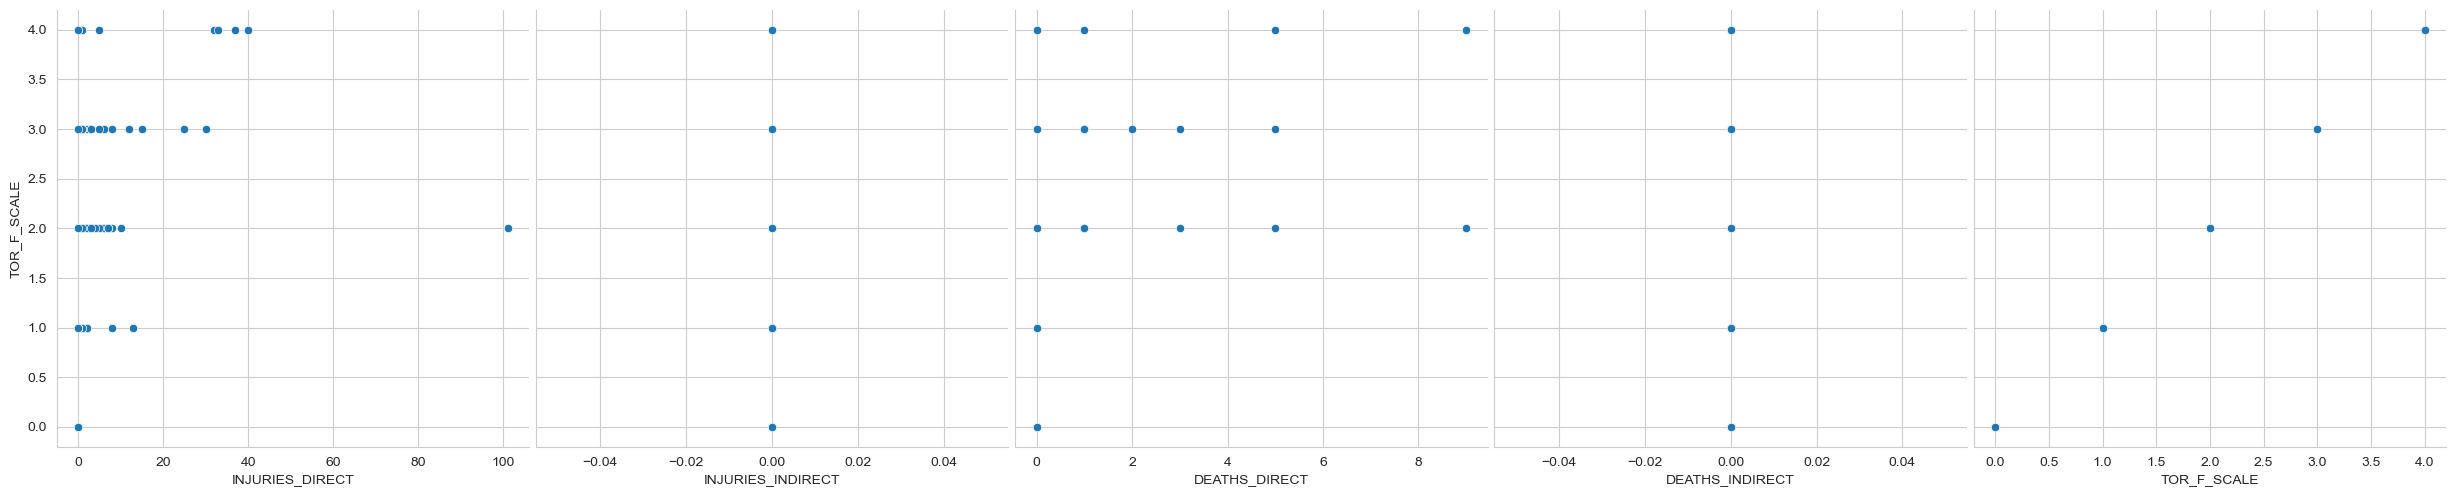

In [76]:
sns.pairplot(storm_train,
                y_vars = ['TOR_F_SCALE'],
                x_vars = features,
                height = 5,
                diag_kind = None)

plt.show()

In [77]:
storm_train[features].corr()

,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,TOR_F_SCALE
INJURIES_DIRECT,1.000000,NaN,0.405839,NaN,0.301135
INJURIES_INDIRECT,NaN,NaN,NaN,NaN,NaN
DEATHS_DIRECT,0.405839,NaN,1.000000,NaN,0.324607
DEATHS_INDIRECT,NaN,NaN,NaN,NaN,NaN
TOR_F_SCALE,0.301135,NaN,0.324607,NaN,1.000000


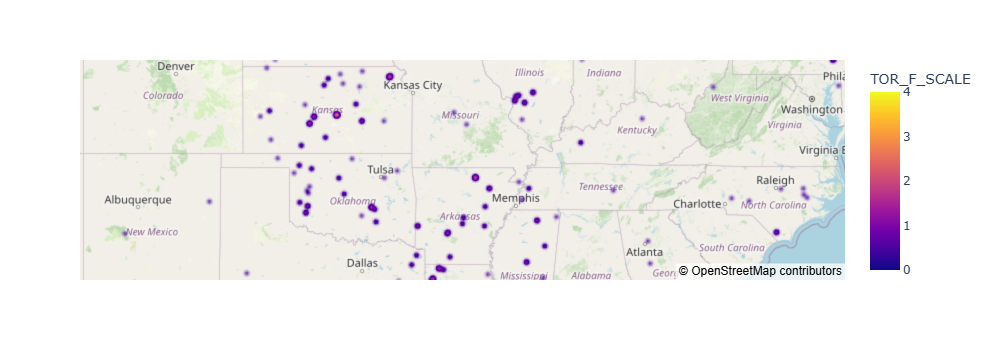

In [78]:
fig = px.density_mapbox(storm_train, lat='BEGIN_LAT', lon='BEGIN_LON', 
                        z='TOR_F_SCALE', radius=5, zoom=4,
                        mapbox_style="open-street-map")
fig.show()

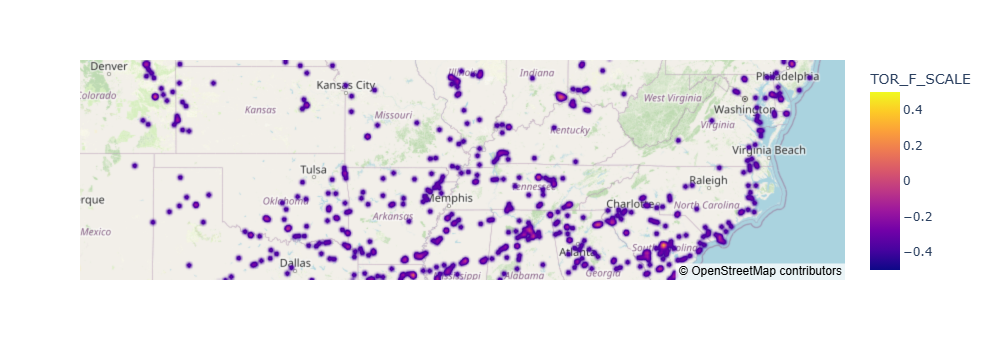

In [79]:
fig = px.density_mapbox(storm_train2, lat='BEGIN_LAT', lon='BEGIN_LON', 
                        z='TOR_F_SCALE', radius=5, zoom=4,
                        mapbox_style="open-street-map")
fig.show()